###**Auto Encoders By Kaushik Manjunatha**
1. Unsupervised Learning.
2. To compress the data.
3. Used in compression , denoising and anomaly detection

In [1]:
#Import Statements
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [2]:
#Loading the MNIST Dataset (loading to Xtrain and Xtest, because it is unsupervised learning)
(x_train, _), (x_test, _) = mnist.load_data()

#Training first 10000 images and rest in validation set
x_train, x_val = x_train[:-10000], x_train[-10000:]

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_val = x_val.astype('float32')/255

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)


(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


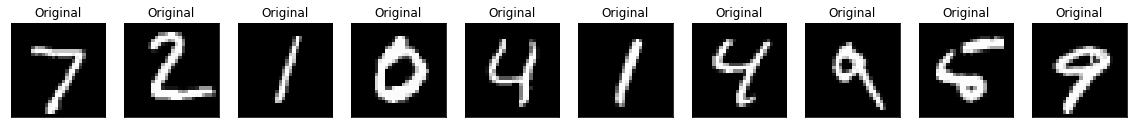

In [3]:
#Visualisation of Images using matplotlib
n = 10
plt.figure(figsize= (20, 4))
for i in range(n):
  #displaying original images
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i])
  plt.title("Original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


In [4]:
#Defining the Autoencoder class
latent_dimension = 64

class Autoencoder(Model):
  def __init__(self, latent_dimension): #defining the constructer
    super(Autoencoder, self).__init__()
    self.latent_dimension = latent_dimension
    #defining encoder
    self.encoder = tf.keras.Sequential([
                                        layers.Flatten(),
                                        layers.Dense(latent_dimension, activation = 'relu'),
    ])
    #defining deencoder
    self.decoder = tf.keras.Sequential([
                                        layers.Dense(784, activation = 'sigmoid'), #we want output from 0 to 1
                                        layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dimension)

  

In [5]:
#Training the Model
autoencoder.compile(optimizer= 'adam', loss = losses.MeanSquaredError())

In [6]:
autoencoder.fit(x_train, x_train,
                epochs = 10,
                shuffle = True,
                validation_data = (x_val, x_val))

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0269 - val_loss: 0.0110
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0080 - val_loss: 0.0062
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0

In [7]:
print(autoencoder.encoder.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
print(autoencoder.decoder.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

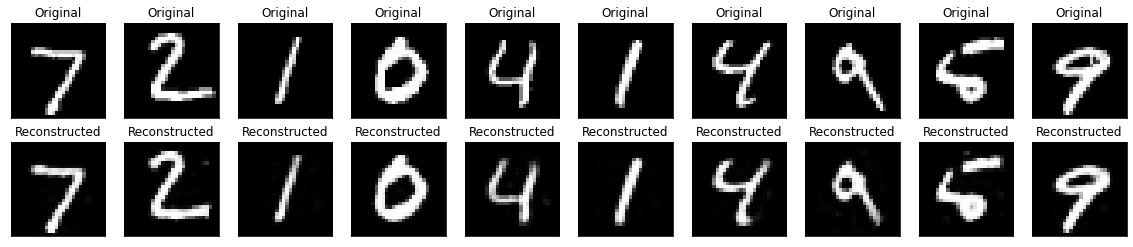

In [10]:
n = 10
plt.figure(figsize= (20, 4))
for i in range(n):
  #displaying original images
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i])
  plt.title("Original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #displaying reconstructed images
  ay = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i])
  plt.title("Reconstructed")
  plt.gray()
  ay.get_xaxis().set_visible(False)
  ay.get_yaxis().set_visible(False)
plt.show()